In [1]:
from sklearn import tree

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
breed= pd.read_csv('pet.csv',low_memory=False)



In [7]:
breed

,breed,description,temperament,height,weight,expectancy,group,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,american bulldog,the american bulldog is a descendant of the en...,loyal,50.160648,41.214400,11.852838,Foundation Stock Service,0.2,occasional,0.6,seasonal,0.8,energetic,0.6,agreeable,0.6,responsive
1,american bulldog,the american bulldog is a descendant of the en...,courageous,62.407348,36.149864,10.433964,Foundation Stock Service,0.2,occasional,0.4,occasional,0.8,energetic,0.6,agreeable,0.6,responsive
2,american bulldog,the american bulldog is a descendant of the en...,loyal,59.176554,33.506510,10.864654,Foundation Stock Service,0.6,2-3 times a week,0.6,seasonal,0.8,energetic,0.6,agreeable,0.6,responsive
3,american bulldog,the american bulldog is a descendant of the en...,courageous,53.804695,41.984555,11.451267,Foundation Stock Service,0.2,occasional,0.6,seasonal,0.8,energetic,0.6,agreeable,0.6,responsive
4,american bulldog,the american bulldog is a descendant of the en...,courageous,58.632139,42.162039,11.144883,Foundation Stock Service,0.2,occasional,0.6,seasonal,0.6,regular exercise,0.6,agreeable,0.6,responsive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,siberian husky,"the graceful, medium-sized siberian husky’s al...",loyal,52.222969,26.172922,13.826148,Working Group,0.4,weekly,0.6,seasonal,0.8,energetic,0.4,independent,0.8,friendly
95,siberian husky,"the graceful, medium-sized siberian husky’s al...",lively,52.725924,25.418021,13.982576,Working Group,0.4,weekly,0.6,seasonal,0.8,energetic,0.4,independent,0.8,friendly
96,siberian husky,"the graceful, medium-sized siberian husky’s al...",friendly,58.339983,17.632373,12.057057,Working Group,0.4,weekly,0.6,seasonal,0.8,energetic,0.4,independent,0.8,friendly
97,siberian husky,"the graceful, medium-sized siberian husky’s al...",loyal,52.182103,24.297437,13.175685,Working Group,0.6,2-3 times a week,0.6,seasonal,0.8,energetic,0.4,independent,1.0,outgoing


In [8]:
from sklearn.model_selection import train_test_split
x=breed.drop(['breed', 'description','temperament','group','grooming_frequency_category','shedding_category','energy_level_category','trainability_category','demeanor_category'],axis=1)
y=breed['breed']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [9]:
x_train

,height,weight,expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
94,52.222969,26.172922,13.826148,0.4,0.6,0.8,0.4,0.8
30,17.799761,3.445294,14.196772,0.2,0.4,0.6,0.4,0.6
28,10.868251,2.993778,15.298984,0.2,0.4,0.6,0.4,0.6
89,32.040497,8.159077,13.376560,0.4,0.8,0.6,0.6,0.8
5,61.688860,38.027700,10.689975,0.2,0.6,0.8,0.6,0.6
...,...,...,...,...,...,...,...,...
60,37.045661,6.002825,13.196996,0.4,0.4,0.6,0.8,0.8
71,64.765460,31.898683,11.015028,0.4,0.8,1.0,1.0,1.0
14,53.544484,10.307851,11.976701,0.4,0.4,0.8,0.8,1.0
92,33.464205,7.553082,13.624041,0.4,0.8,0.6,0.6,1.0


In [10]:
y_train

94         siberian husky
30              chihuahua
28              chihuahua
89                    pug
5        american bulldog
             ...         
60         japanese spitz
71              labrador 
14                  boxer
92                    pug
51    german shepherd dog
Name: breed, Length: 69, dtype: object

In [11]:
x_test

,height,weight,expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
62,37.550361,7.767746,12.089486,0.4,0.4,0.6,0.8,0.8
40,36.019619,9.958975,11.361930,0.8,0.6,0.6,1.0,7.0
95,52.725924,25.418021,13.982576,0.4,0.6,0.8,0.4,0.8
18,53.668837,20.811434,11.800960,0.4,0.4,0.8,0.8,1.0
97,52.182103,24.297437,13.175685,0.6,0.6,0.8,0.4,1.0
84,30.853086,3.729393,14.476383,1.0,0.2,0.6,1.0,0.8
64,37.317052,7.393704,12.389748,0.4,0.4,0.6,0.8,0.8
42,48.334708,27.905747,12.658382,0.4,1.0,0.8,0.6,0.6
10,31.176666,7.736543,14.347438,0.6,0.6,0.8,0.6,0.6
0,50.160648,41.214400,11.852838,0.2,0.6,0.8,0.6,0.6


In [12]:
y_test

62         japanese spitz
40         cocker spaniel
95         siberian husky
18                  boxer
97         siberian husky
84                 poodle
64         japanese spitz
42              dalmatian
10                 beagle
0        american bulldog
31              chihuahua
76             pomeranian
47    german shepherd dog
26              chihuahua
44              dalmatian
4        american bulldog
22                bulldog
12                  boxer
88                    pug
73             pomeranian
49    german shepherd dog
70              labrador 
68              labrador 
15                  boxer
39         cocker spaniel
33         cocker spaniel
9                  beagle
81                 poodle
11                 beagle
65         japanese spitz
Name: breed, dtype: object

In [13]:
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dt.predict(x_train)

In [15]:
y_pred

array(['siberian husky', 'chihuahua', 'chihuahua', 'pug',
       'american bulldog', 'dalmatian', 'labrador ', 'cocker spaniel',
       'boxer', 'pomeranian', 'cocker spaniel', 'beagle',
       'golden retriever', 'chihuahua', 'bulldog', 'poodle ', 'chihuahua',
       'german shepherd dog', 'boxer', 'bulldog', 'american bulldog',
       'boxer', 'cocker spaniel', 'beagle', 'pomeranian', 'beagle',
       'poodle', 'cocker spaniel', 'pug', 'golden retriever',
       'siberian husky', 'golden retriever', 'dalmatian',
       'german shepherd dog', 'labrador ', 'dalmatian', 'labrador ',
       'japanese spitz', 'siberian husky', 'pomeranian', 'dalmatian',
       'golden retriever', 'german shepherd dog', 'poodle',
       'golden retriever', 'pomeranian', 'cocker spaniel',
       'siberian husky', 'golden retriever', 'japanese spitz', 'poodle',
       'cocker spaniel', 'chihuahua', 'american bulldog',
       'german shepherd dog', 'bulldog', 'american bulldog', 'bulldog',
       'pug', 'pug'

[Text(0.6666666666666666, 0.9545454545454546, 'x[5] <= 0.9\ngini = 0.933\nsamples = 69\nvalue = [4, 3, 4, 5, 5, 6, 4, 5, 6, 3, 4, 5, 5, 1\n5, 4]'),
 Text(0.48148148148148145, 0.8636363636363636, 'x[3] <= 0.7\ngini = 0.923\nsamples = 59\nvalue = [4, 3, 4, 5, 5, 6, 4, 5, 0, 3, 0, 5, 5, 1\n5, 4]'),
 Text(0.3333333333333333, 0.7727272727272727, 'x[6] <= 0.9\ngini = 0.906\nsamples = 47\nvalue = [4, 3, 4, 5, 5, 0, 4, 5, 0, 3, 0, 5, 0, 0\n5, 4]'),
 Text(0.25925925925925924, 0.6818181818181818, 'x[2] <= 9.691\ngini = 0.897\nsamples = 42\nvalue = [4, 3, 4, 5, 5, 0, 4, 0, 0, 3, 0, 5, 0, 0\n5, 4]'),
 Text(0.18518518518518517, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.3333333333333333, 0.5909090909090909, 'x[0] <= 24.262\ngini = 0.885\nsamples = 37\nvalue = [4, 3, 4, 0, 5, 0, 4, 0, 0, 3, 0, 5, 0, 0\n5, 4]'),
 Text(0.14814814814814814, 0.5, 'x[4] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 

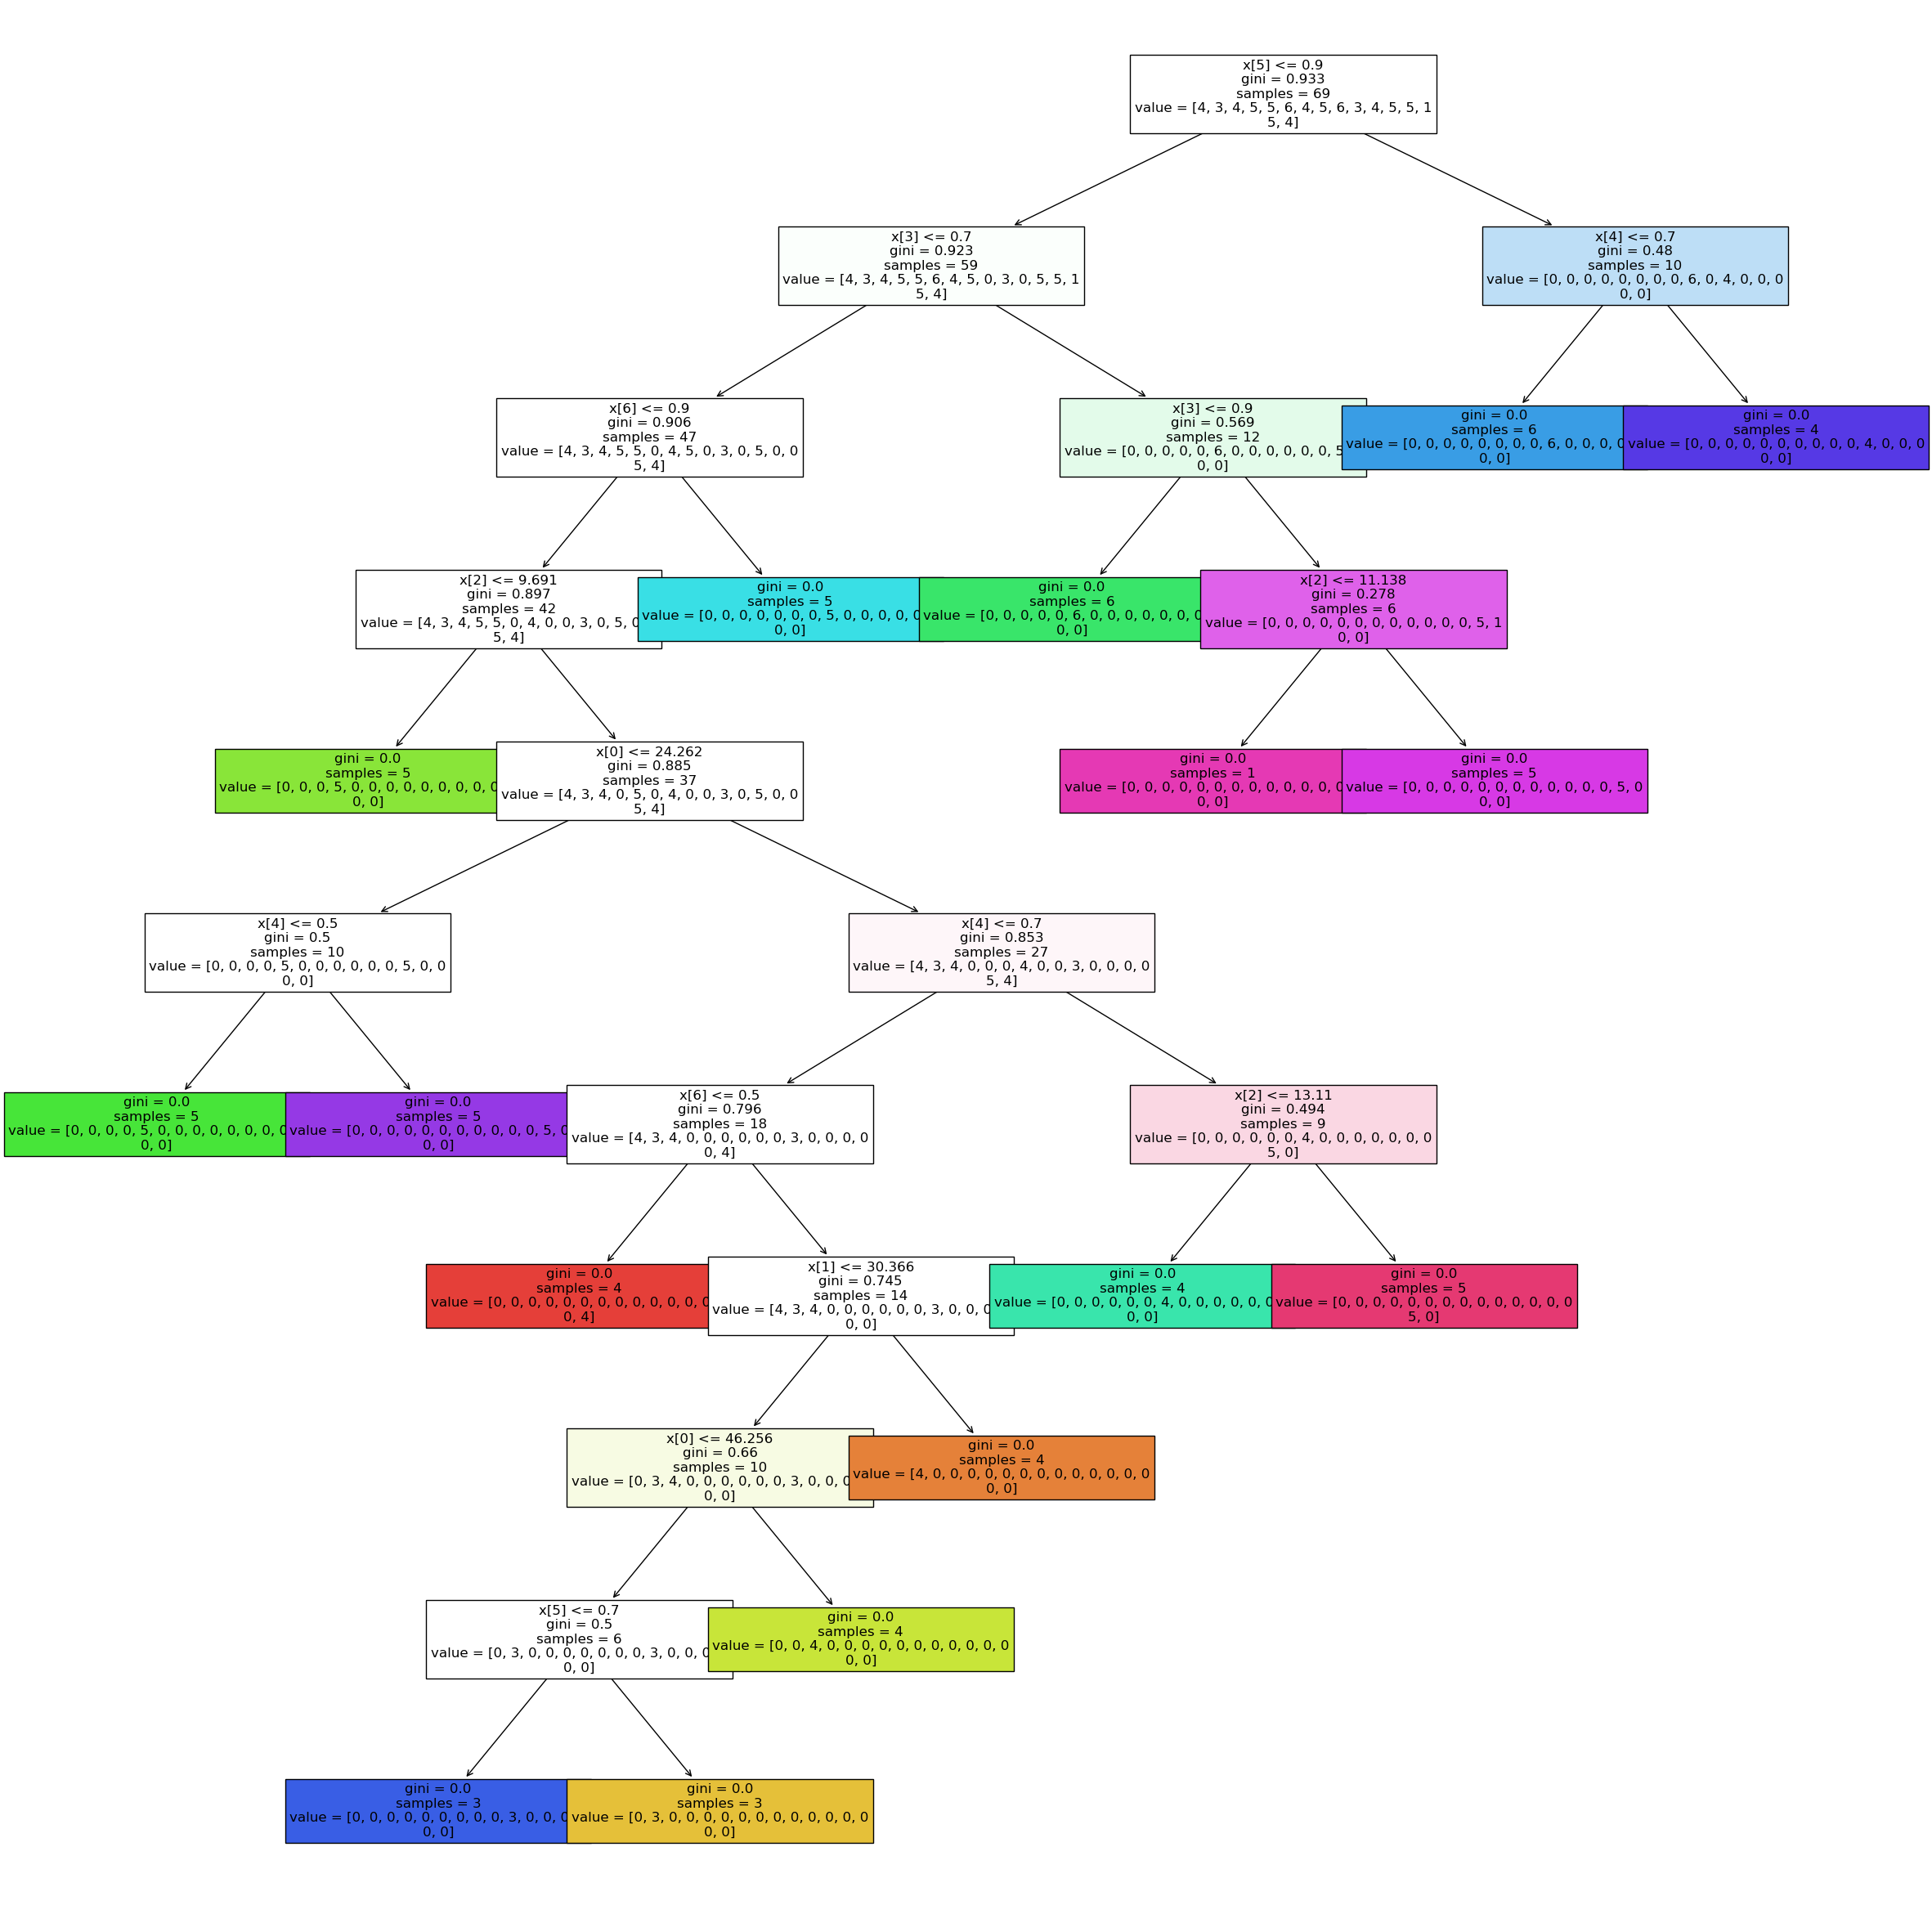

In [16]:
plt.figure(figsize = (30,30))
tree.plot_tree(dt, filled = True, fontsize = 12)

In [17]:
x_train.iloc[0]

height                      52.222969
weight                      26.172922
expectancy                  13.826148
grooming_frequency_value     0.400000
shedding_value               0.600000
energy_level_value           0.800000
trainability_value           0.400000
demeanor_value               0.800000
Name: 94, dtype: float64

In [18]:
y_train.iloc[0]

'siberian husky'

In [19]:
x_train

,height,weight,expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
94,52.222969,26.172922,13.826148,0.4,0.6,0.8,0.4,0.8
30,17.799761,3.445294,14.196772,0.2,0.4,0.6,0.4,0.6
28,10.868251,2.993778,15.298984,0.2,0.4,0.6,0.4,0.6
89,32.040497,8.159077,13.376560,0.4,0.8,0.6,0.6,0.8
5,61.688860,38.027700,10.689975,0.2,0.6,0.8,0.6,0.6
...,...,...,...,...,...,...,...,...
60,37.045661,6.002825,13.196996,0.4,0.4,0.6,0.8,0.8
71,64.765460,31.898683,11.015028,0.4,0.8,1.0,1.0,1.0
14,53.544484,10.307851,11.976701,0.4,0.4,0.8,0.8,1.0
92,33.464205,7.553082,13.624041,0.4,0.8,0.6,0.6,1.0


In [20]:
y_train

94         siberian husky
30              chihuahua
28              chihuahua
89                    pug
5        american bulldog
             ...         
60         japanese spitz
71              labrador 
14                  boxer
92                    pug
51    german shepherd dog
Name: breed, Length: 69, dtype: object

In [21]:
dt.predict(x_train)

array(['siberian husky', 'chihuahua', 'chihuahua', 'pug',
       'american bulldog', 'dalmatian', 'labrador ', 'cocker spaniel',
       'boxer', 'pomeranian', 'cocker spaniel', 'beagle',
       'golden retriever', 'chihuahua', 'bulldog', 'poodle ', 'chihuahua',
       'german shepherd dog', 'boxer', 'bulldog', 'american bulldog',
       'boxer', 'cocker spaniel', 'beagle', 'pomeranian', 'beagle',
       'poodle', 'cocker spaniel', 'pug', 'golden retriever',
       'siberian husky', 'golden retriever', 'dalmatian',
       'german shepherd dog', 'labrador ', 'dalmatian', 'labrador ',
       'japanese spitz', 'siberian husky', 'pomeranian', 'dalmatian',
       'golden retriever', 'german shepherd dog', 'poodle',
       'golden retriever', 'pomeranian', 'cocker spaniel',
       'siberian husky', 'golden retriever', 'japanese spitz', 'poodle',
       'cocker spaniel', 'chihuahua', 'american bulldog',
       'german shepherd dog', 'bulldog', 'american bulldog', 'bulldog',
       'pug', 'pug'

In [22]:
from sklearn.metrics import accuracy_score
x = dt.predict(x_test)
y = y_test
accuracy = accuracy_score(y, x)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [23]:
x_train.iloc[1]

height                      17.799761
weight                       3.445294
expectancy                  14.196772
grooming_frequency_value     0.200000
shedding_value               0.400000
energy_level_value           0.600000
trainability_value           0.400000
demeanor_value               0.600000
Name: 30, dtype: float64

In [24]:
y_train.iloc[1]

'chihuahua'

In [28]:
dt.predict(x_train)

array(['siberian husky', 'chihuahua', 'chihuahua', 'pug',
       'american bulldog', 'dalmatian', 'labrador ', 'cocker spaniel',
       'boxer', 'pomeranian', 'cocker spaniel', 'beagle',
       'golden retriever', 'chihuahua', 'bulldog', 'poodle ', 'chihuahua',
       'german shepherd dog', 'boxer', 'bulldog', 'american bulldog',
       'boxer', 'cocker spaniel', 'beagle', 'pomeranian', 'beagle',
       'poodle', 'cocker spaniel', 'pug', 'golden retriever',
       'siberian husky', 'golden retriever', 'dalmatian',
       'german shepherd dog', 'labrador ', 'dalmatian', 'labrador ',
       'japanese spitz', 'siberian husky', 'pomeranian', 'dalmatian',
       'golden retriever', 'german shepherd dog', 'poodle',
       'golden retriever', 'pomeranian', 'cocker spaniel',
       'siberian husky', 'golden retriever', 'japanese spitz', 'poodle',
       'cocker spaniel', 'chihuahua', 'american bulldog',
       'german shepherd dog', 'bulldog', 'american bulldog', 'bulldog',
       'pug', 'pug'

In [29]:
x_test


,height,weight,expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
62,37.550361,7.767746,12.089486,0.4,0.4,0.6,0.8,0.8
40,36.019619,9.958975,11.361930,0.8,0.6,0.6,1.0,7.0
95,52.725924,25.418021,13.982576,0.4,0.6,0.8,0.4,0.8
18,53.668837,20.811434,11.800960,0.4,0.4,0.8,0.8,1.0
97,52.182103,24.297437,13.175685,0.6,0.6,0.8,0.4,1.0
84,30.853086,3.729393,14.476383,1.0,0.2,0.6,1.0,0.8
64,37.317052,7.393704,12.389748,0.4,0.4,0.6,0.8,0.8
42,48.334708,27.905747,12.658382,0.4,1.0,0.8,0.6,0.6
10,31.176666,7.736543,14.347438,0.6,0.6,0.8,0.6,0.6
0,50.160648,41.214400,11.852838,0.2,0.6,0.8,0.6,0.6


In [30]:
y_test

62         japanese spitz
40         cocker spaniel
95         siberian husky
18                  boxer
97         siberian husky
84                 poodle
64         japanese spitz
42              dalmatian
10                 beagle
0        american bulldog
31              chihuahua
76             pomeranian
47    german shepherd dog
26              chihuahua
44              dalmatian
4        american bulldog
22                bulldog
12                  boxer
88                    pug
73             pomeranian
49    german shepherd dog
70              labrador 
68              labrador 
15                  boxer
39         cocker spaniel
33         cocker spaniel
9                  beagle
81                 poodle
11                 beagle
65         japanese spitz
Name: breed, dtype: object

In [31]:
dt.predict(x_test)

array(['japanese spitz', 'cocker spaniel', 'siberian husky', 'boxer',
       'siberian husky', 'poodle', 'japanese spitz', 'dalmatian',
       'beagle', 'american bulldog', 'pomeranian', 'pomeranian',
       'german shepherd dog', 'chihuahua', 'dalmatian',
       'american bulldog', 'bulldog', 'boxer', 'pug', 'pomeranian',
       'german shepherd dog', 'labrador ', 'labrador ', 'boxer',
       'cocker spaniel', 'cocker spaniel', 'beagle', 'poodle', 'beagle',
       'japanese spitz'], dtype=object)